In [1]:
import pandas as pd
import time

# 데이터 로드
start = time.time()
df = pd.read_csv('./wine_review.csv')
end = time.time()

print("Loading took " + str(round(end - start, 2)) + " seconds")

# 데이터 구조 확인
df.info()

# 데이터 샘플 확인
df.head()

Loading took 0.13 seconds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2890 non-null   object 
 1   asins                 870 non-null    object 
 2   brand                 2825 non-null   object 
 3   categories            2890 non-null   object 
 4   dateAdded             2890 non-null   object 
 5   dateUpdated           2890 non-null   object 
 6   descriptions          2738 non-null   object 
 7   dimension             1838 non-null   object 
 8   ean                   2166 non-null   object 
 9   flavors               151 non-null    object 
 10  keys                  2890 non-null   object 
 11  manufacturer          849 non-null    object 
 12  manufacturerNumber    2457 non-null   object 
 13  name                  2890 non-null   object 
 14  reviews.date          2552 non-null   object 


,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


In [2]:
# 감성 분석에 필요한 컬럼만 선택
df = df[['reviews.text']]

# 결측값 확인
df.isnull().sum()

reviews.text    1
dtype: int64

In [3]:
# 결측값 제거
df = df.dropna(subset=['reviews.text'])

# 컬럼명 변경
df = df.rename(columns={'reviews.text': 'reviews_text'})

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2889 entries, 0 to 2889
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews_text  2889 non-null   object
dtypes: object(1)
memory usage: 45.1+ KB


,reviews_text
0,This a fantastic white wine for any occasion!
1,"Tart, not sweet...very refreshing and delicious!"
2,I was given this wine so it was a delightful s...
3,This is a phenomenal wine and my new favorite ...
4,4 750ml bottles for the price of two With way ...


In [4]:
%pip install nltk
import time
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer # nltk의 VADER 감정 분석기를 가져옮
nltk.download('vader_lexicon') # VADER 감정 분석기에 필요한 어휘 자료를 다운로드
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Remove stop words - can be slow for a lot of text!
# Ryan Han (ryanxjhan on Kaggle) has a great post measuring performance of different stop words removal approaches
# https://www.kaggle.com/ryanxjhan/fast-stop-words-removal # using the approach that Ryan recommends
start = time.time()

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Stopword removal and lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

def remove_stopwords(review):
    text = " ".join([word for word in review.split() if word not in stop_words])
    return text

# Remove the stop words from both columns
# df.reviews_text = df.reviews_text.apply(remove_stopwords)   
df['processed_reviews'] = df['reviews_text'].apply(preprocess_text)

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
vader_sentiment = SentimentIntensityAnalyzer() # VADER 감정 분석기를 초기화

# There are 3 possibilities of input for a review:
# It could be "No Negative", in which case, return 0
# It could be "No Positive", in which case, return 0
# It could be a review, in which case calculate the sentiment
def calc_sentiment(review):    
    if review == "No Negative" or review == "No Positive": # 리뷰가 "No Negative" 또는 "No Positive"인 경우
        return 0
    return vader_sentiment.polarity_scores(review)["compound"]  # 리뷰가 텍스트인 경우 VADER 감정 분석기를 사용하여 감정 점수(컴파운드 스코어)를 계산하고 반환

In [17]:
# Add a negative sentiment and positive sentiment column
print("Calculating sentiment columns for both positive and negative reviews")
start = time.time()
df["Sentiment"] = df.reviews_text.apply(calc_sentiment)
end = time.time()
print("Calculating sentiment took " + str(round(end - start, 2)) + " seconds")

Calculating sentiment columns for both positive and negative reviews
Calculating sentiment took 1.19 seconds


In [18]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2889 entries, 2804 to 1124
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews_text       2889 non-null   object 
 1   processed_reviews  2889 non-null   object 
 2   Sentiment          2889 non-null   float64
 3   compound           2889 non-null   float64
 4   sentiment_label    2889 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 135.4+ KB


,reviews_text,processed_reviews,Sentiment,compound,sentiment_label
2804,Bought the wine for my son for a Christmas pre...,bought wine son christmas present skeptical fi...,-0.9311,-0.9311,0
222,It's not often that you come across a wine thi...,often come across wine bad tasted cooking wine...,-0.9098,-0.9098,0
1440,"First, let's establish that the whole point of...",first let establish whole point buying tube cr...,-0.9062,-0.9062,0
2523,"I know people claim that Carmex is addictive, ...",know people claim carmex addictive know claim ...,-0.9047,-0.9047,0
2380,this little jar's contents are the item to go ...,little jar content item go stress seasonal pai...,-0.9042,-0.9042,0


In [8]:
# Print of the results and see if the sentiment matches the review

df = df.sort_values(by=["Sentiment"], ascending=True)
print(df[["reviews_text", "Sentiment"]])

                                           reviews_text  Sentiment
2804  Bought the wine for my son for a Christmas pre...    -0.9311
222   It's not often that you come across a wine thi...    -0.9098
1440  First, let's establish that the whole point of...    -0.9062
2523  I know people claim that Carmex is addictive, ...    -0.9047
2380  this little jar's contents are the item to go ...    -0.9042
...                                                 ...        ...
646   I haven't had a chance to brew this beer, but ...     0.9956
642   I haven't had a chance to brew this beer, but ...     0.9956
652   I haven't had a chance to brew this beer, but ...     0.9956
653   I haven't had a chance to brew this beer, but ...     0.9956
1124  Do you love margaritas They are among the most...     0.9985

[2889 rows x 2 columns]


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 감성 점수 분리
df['compound'] = df['reviews_text'].apply(lambda text: vader_sentiment.polarity_scores(text)['compound'])

# 긍정/부정 레이블 생성
df['sentiment_label'] = df['compound'].apply(lambda x: 1 if x >= 0 else 0)

# 특징 및 레이블 설정
X = df['reviews_text']
y = df['sentiment_label']

# 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# 파이프라인 구성
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear'))
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [0.75, 1.0],
    'clf__C': [0.1, 1, 10]
}

# 그리드 서치 적용
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
best_params = grid_search.best_params_

In [11]:
# 테스트 세트 예측
y_pred = grid_search.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, grid_search.decision_function(X_test))

# 평가 결과
evaluation_results = {
    'Best Params': best_params,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
}

evaluation_results

{'Best Params': {'clf__C': 10,
  'tfidf__max_df': 0.75,
  'tfidf__ngram_range': (1, 2)},
 'Accuracy': 0.9290657439446367,
 'Precision': 0.9273049645390071,
 'Recall': 1.0,
 'F1 Score': 0.9622815087396505,
 'ROC-AUC': 0.9173300886494002}

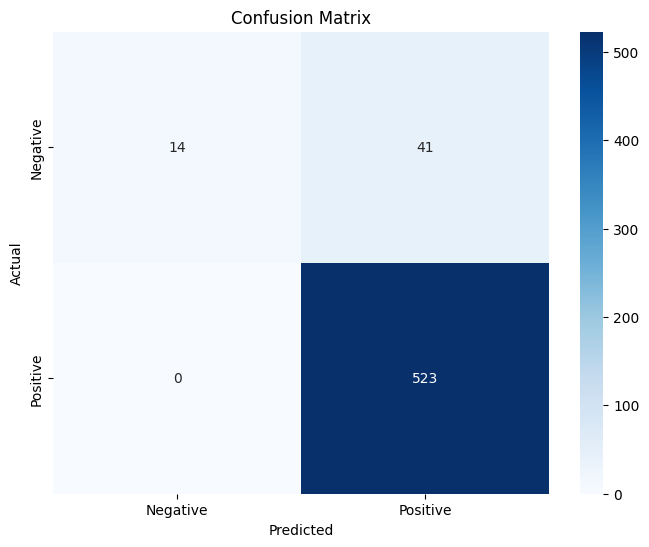

In [12]:
# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


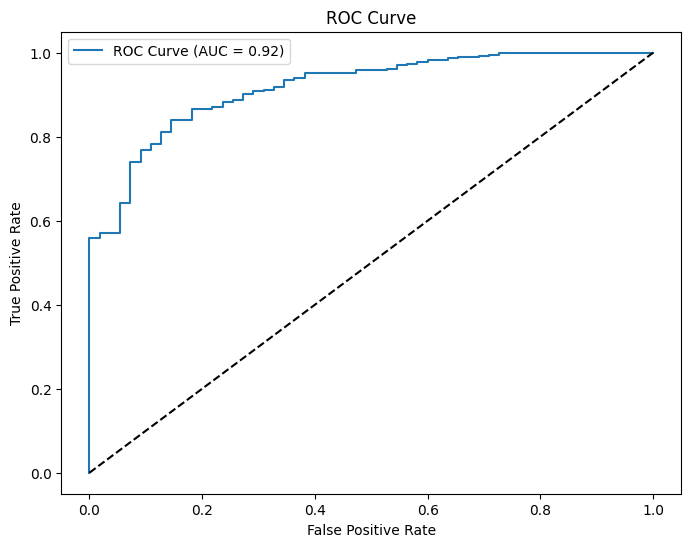

In [13]:

# ROC 곡선 시각화
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, grid_search.decision_function(X_test))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [14]:
df

,reviews_text,processed_reviews,Sentiment,compound,sentiment_label
2804,Bought the wine for my son for a Christmas pre...,bought wine son christmas present skeptical fi...,-0.9311,-0.9311,0
222,It's not often that you come across a wine thi...,often come across wine bad tasted cooking wine...,-0.9098,-0.9098,0
1440,"First, let's establish that the whole point of...",first let establish whole point buying tube cr...,-0.9062,-0.9062,0
2523,"I know people claim that Carmex is addictive, ...",know people claim carmex addictive know claim ...,-0.9047,-0.9047,0
2380,this little jar's contents are the item to go ...,little jar content item go stress seasonal pai...,-0.9042,-0.9042,0
...,...,...,...,...,...
646,"I haven't had a chance to brew this beer, but ...",chance brew beer everything process great far ...,0.9956,0.9956,1
642,"I haven't had a chance to brew this beer, but ...",chance brew beer everything process great far ...,0.9956,0.9956,1
652,"I haven't had a chance to brew this beer, but ...",chance brew beer everything process great far ...,0.9956,0.9956,1
653,"I haven't had a chance to brew this beer, but ...",chance brew beer everything process great far ...,0.9956,0.9956,1
